In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Imports needed for the script
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
csv_original = 'ceneval_mentor_v3.csv'
df= pd.read_csv(csv_original, encoding='latin-1', low_memory=False)


In [3]:
pd.value_counts(df['DICTAMEN'])

1    8147
0    7466
Name: DICTAMEN, dtype: int64

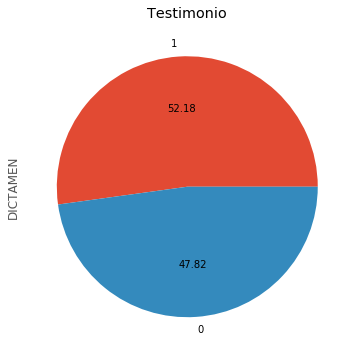

In [4]:
plot = df['DICTAMEN'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Testimonio')

In [5]:
pd.crosstab(index=df['TIPO_EXA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
TIPO_EXA,,
0.0000,100.000000,0.000000
0.0004,65.254237,34.745763
0.0012,87.870620,12.129380
0.0018,20.000000,80.000000
0.0028,79.636364,20.363636
0.0039,60.493827,39.506173
0.0077,68.181818,31.818182
0.0079,51.127820,48.872180
0.0087,23.655914,76.344086


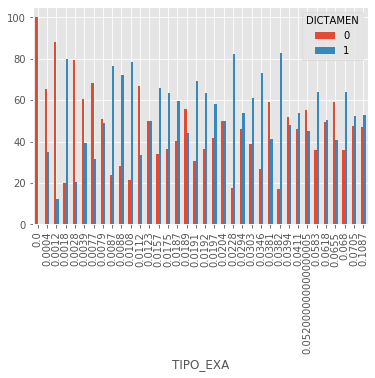

In [6]:
plot = pd.crosstab(index=df['TIPO_EXA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [7]:
pd.crosstab(index=df['ANO_NAC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
ANO_NAC,,
0.62500,0.000000,100.000000
0.65625,18.750000,81.250000
0.68750,23.076923,76.923077
0.71875,52.252252,47.747748
0.75000,44.806049,55.193951
0.78125,44.542698,55.457302
0.81250,44.639656,55.360344
0.84375,50.833333,49.166667
0.87500,53.538462,46.461538


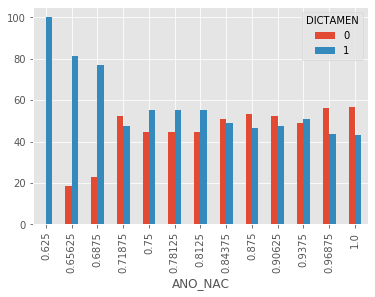

In [8]:
plot = pd.crosstab(index=df['ANO_NAC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [9]:
pd.crosstab(index=df['SEXO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SEXO,,
0,44.362237,55.637763
1,50.457369,49.542631


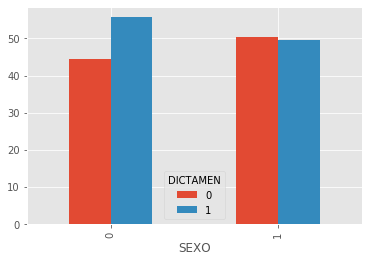

In [10]:
plot = pd.crosstab(index=df['SEXO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [11]:
pd.crosstab(index=df['LENG_MA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
LENG_MA,,
0.0,47.355881,52.644119
1.0,61.706349,38.293651


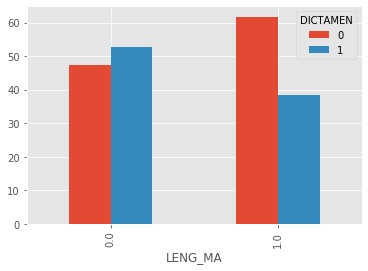

In [12]:
plot = pd.crosstab(index=df['LENG_MA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [13]:
pd.crosstab(index=df['LENG_PA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
LENG_PA,,
0.0,47.369117,52.630883
1.0,61.855670,38.144330


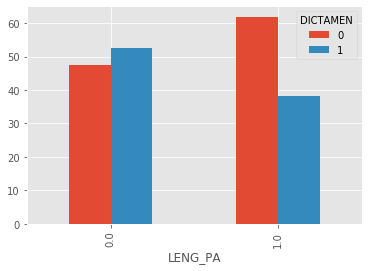

In [14]:
plot = pd.crosstab(index=df['LENG_PA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [15]:
pd.crosstab(index=df['PLT_PROC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
PLT_PROC,,
0.0050,56.842105,43.157895
0.0132,73.786408,26.213592
0.0153,77.413479,22.586521
0.0189,71.132075,28.867925
0.0220,80.972516,19.027484
0.0240,58.474576,41.525424
0.0259,61.397059,38.602941
0.0355,66.743383,33.256617
0.0434,58.830409,41.169591


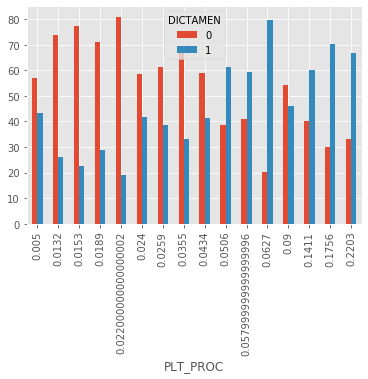

In [16]:
plot = pd.crosstab(index=df['PLT_PROC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


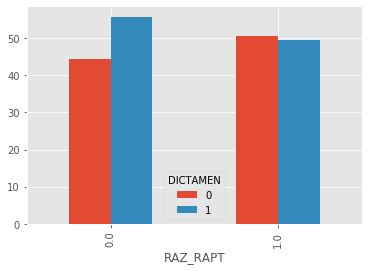

In [17]:
plot = pd.crosstab(index=df['RAZ_RAPT'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [18]:
pd.crosstab(index=df['RAZ_RAPT'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
RAZ_RAPT,,
0.0,44.288487,55.711513
1.0,50.471063,49.528937


In [19]:
pd.crosstab(index=df['RAZ_RACT'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
RAZ_RACT,,
0.0,42.385542,57.614458
1.0,49.786269,50.213731


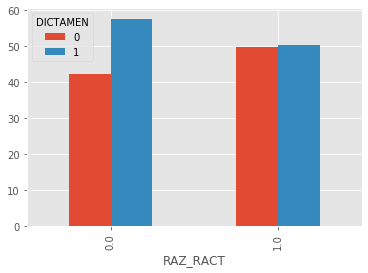

In [20]:
plot = pd.crosstab(index=df['RAZ_RACT'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [21]:
pd.crosstab(index=df['RAZ_OPT'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
RAZ_OPT,,
0.0,39.929536,60.070464
1.0,48.785047,51.214953


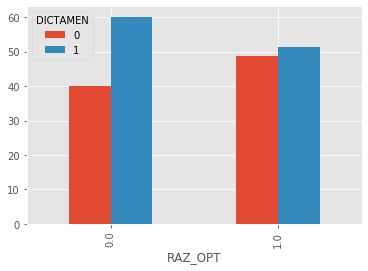

In [22]:
plot = pd.crosstab(index=df['RAZ_OPT'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [23]:
pd.crosstab(index=df['RAZ_PCUM'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
RAZ_PCUM,,
0.0,47.936844,52.063156
1.0,47.384245,52.615755


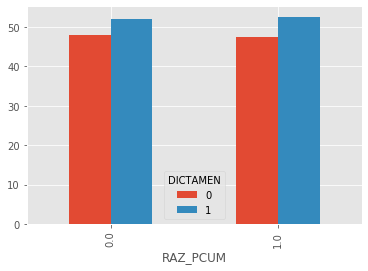

In [24]:
plot = pd.crosstab(index=df['RAZ_PCUM'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [25]:
pd.crosstab(index=df['RAZ_CMNF'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
RAZ_CMNF,,
0.0,49.739260,50.260740
1.0,47.151735,52.848265


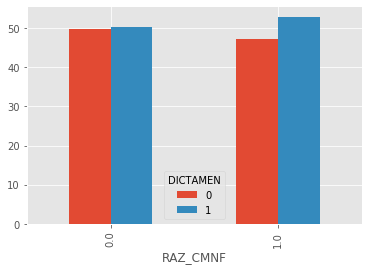

In [26]:
plot = pd.crosstab(index=df['RAZ_CMNF'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [27]:
pd.crosstab(index=df['REG_PROC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
REG_PROC,,
0.0,54.910714,45.089286
1.0,47.715901,52.284099


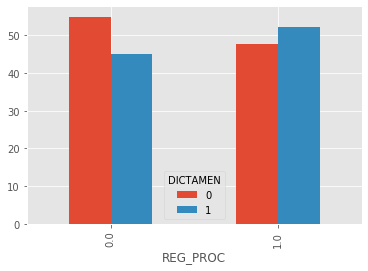

In [28]:
plot = pd.crosstab(index=df['REG_PROC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [29]:
pd.crosstab(index=df['BECA_DAC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
BECA_DAC,,
0.0,48.185442,51.814558
1.0,43.826220,56.173780


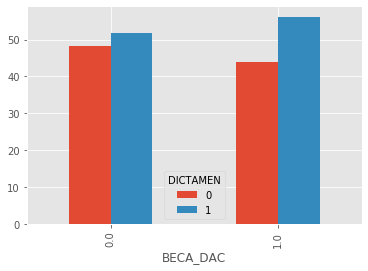

In [30]:
plot = pd.crosstab(index=df['BECA_DAC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [31]:
pd.crosstab(index=df['BECA_NEC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
BECA_NEC,,
0.0,46.691646,53.308354
1.0,51.240310,48.759690


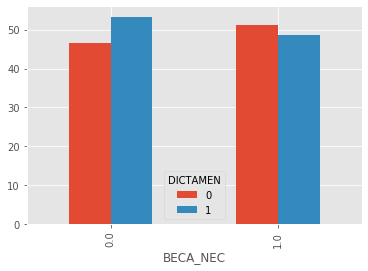

In [32]:
plot = pd.crosstab(index=df['BECA_NEC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [33]:
pd.crosstab(index=df['OPI_NIVE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
OPI_NIVE,,
0.0,51.188300,48.811700
1.0,47.696801,52.303199


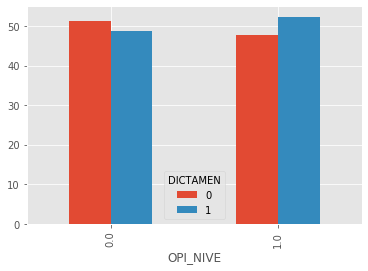

In [34]:
plot = pd.crosstab(index=df['OPI_NIVE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [35]:
pd.crosstab(index=df['OPI_SLC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
OPI_SLC,,
0.0,44.687500,55.312500
1.0,48.024295,51.975705


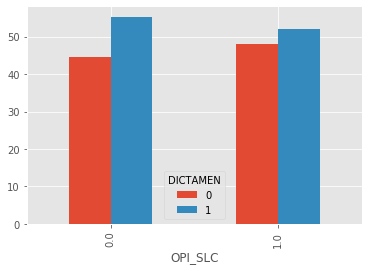

In [36]:
plot = pd.crosstab(index=df['OPI_SLC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [37]:
pd.crosstab(index=df['OPI_SERI'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
OPI_SERI,,
0.0,47.229917,52.770083
1.0,47.847693,52.152307


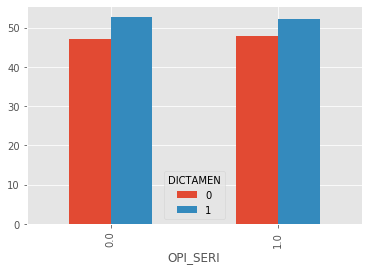

In [38]:
plot = pd.crosstab(index=df['OPI_SERI'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [39]:
pd.crosstab(index=df['OPI_NIBA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
OPI_NIBA,,
0.0,46.192524,53.807476
1.0,59.629630,40.370370


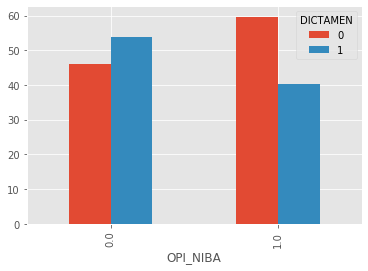

In [40]:
plot = pd.crosstab(index=df['OPI_NIBA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [41]:
pd.crosstab(index=df['OPI_ARM'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
OPI_ARM,,
0.0,53.978495,46.021505
1.0,47.630050,52.369950


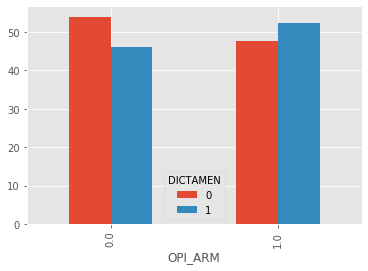

In [42]:
plot = pd.crosstab(index=df['OPI_ARM'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [43]:
pd.crosstab(index=df['COM_ESES'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
COM_ESES,,
0.0,55.214724,44.785276
1.0,47.145153,52.854847


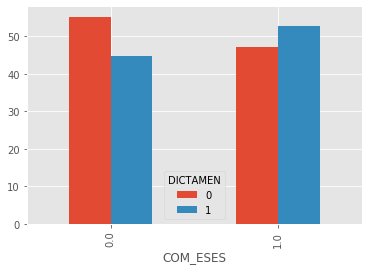

In [44]:
plot = pd.crosstab(index=df['COM_ESES'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [45]:
pd.crosstab(index=df['COM_ESMA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
COM_ESMA,,
0.0,54.545455,45.454545
1.0,47.100525,52.899475


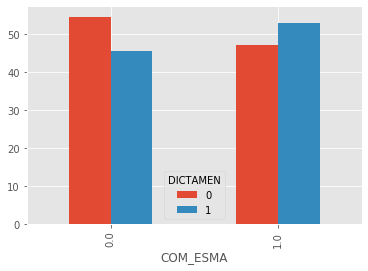

In [46]:
plot = pd.crosstab(index=df['COM_ESMA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [47]:
pd.crosstab(index=df['COM_ESAE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
COM_ESAE,,
0.0,43.855665,56.144335
1.0,49.167382,50.832618


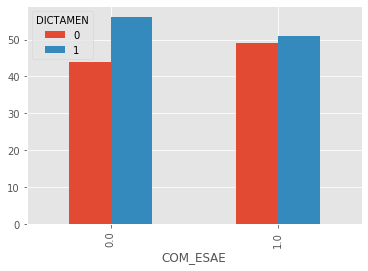

In [48]:
plot = pd.crosstab(index=df['COM_ESAE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [49]:
pd.crosstab(index=df['COM_EPAD'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
COM_EPAD,,
0.0,42.502106,57.497894
1.0,50.142660,49.857340


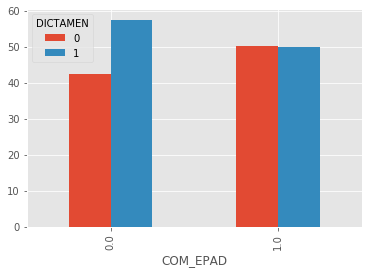

In [50]:
plot = pd.crosstab(index=df['COM_EPAD'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [51]:
pd.crosstab(index=df['FOPR_ASAC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_ASAC,,
0.0,45.078300,54.921700
1.0,47.985597,52.014403


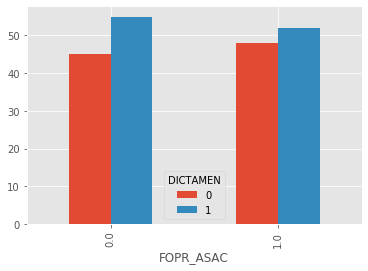

In [52]:
plot = pd.crosstab(index=df['FOPR_ASAC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [53]:
pd.crosstab(index=df['FOPR_TUTO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_TUTO,,
0.0,42.630241,57.369759
1.0,48.400883,51.599117


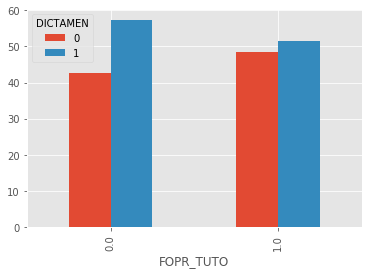

In [54]:
plot = pd.crosstab(index=df['FOPR_TUTO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [55]:
pd.crosstab(index=df['FOPR_APPS'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_APPS,,
0.0,46.721311,53.278689
1.0,48.170062,51.829938


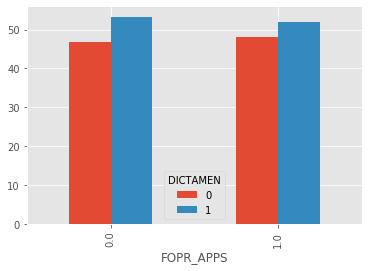

In [56]:
plot = pd.crosstab(index=df['FOPR_APPS'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [57]:
pd.crosstab(index=df['FOPR_PRMO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_PRMO,,
0.0,45.738137,54.261863
1.0,48.174252,51.825748


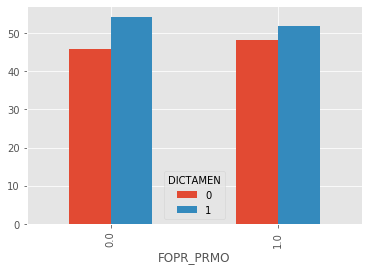

In [58]:
plot = pd.crosstab(index=df['FOPR_PRMO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [59]:
pd.crosstab(index=df['FOPR_ELEX'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_ELEX,,
0.0,47.117567,52.882433
1.0,47.934377,52.065623


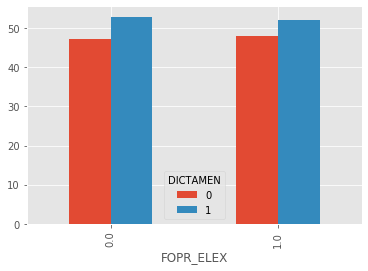

In [60]:
plot = pd.crosstab(index=df['FOPR_ELEX'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [61]:
pd.crosstab(index=df['FOPR_CLEX'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_CLEX,,
0.0,50.223547,49.776453
1.0,47.593021,52.406979


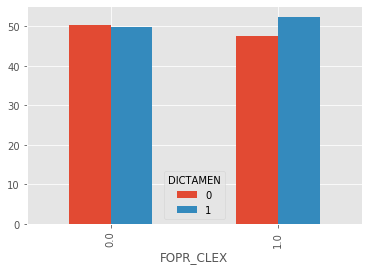

In [62]:
plot = pd.crosstab(index=df['FOPR_CLEX'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [63]:
pd.crosstab(index=df['FOPR_AULA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_AULA,,
0.0,53.600000,46.400000
1.0,47.772469,52.227531


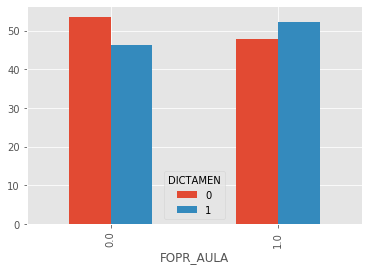

In [64]:
plot = pd.crosstab(index=df['FOPR_AULA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [65]:
pd.crosstab(index=df['FOPR_LATA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_LATA,,
0.0,56.505576,43.494424
1.0,47.509121,52.490879


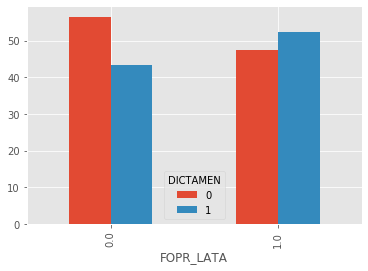

In [66]:
plot = pd.crosstab(index=df['FOPR_LATA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [67]:
pd.crosstab(index=df['FOPR_BIBL'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_BIBL,,
0.0,62.500000,37.500000
1.0,47.605432,52.394568


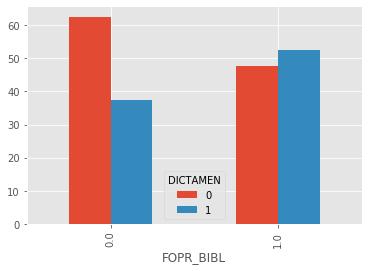

In [68]:
plot = pd.crosstab(index=df['FOPR_BIBL'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [69]:
pd.crosstab(index=df['FOPR_SACO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_SACO,,
0.0,60.519481,39.480519
1.0,47.498030,52.501970


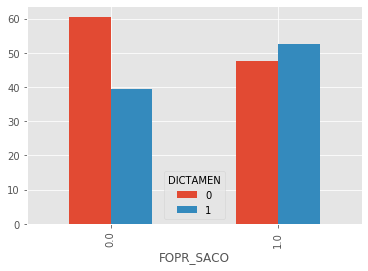

In [70]:
plot = pd.crosstab(index=df['FOPR_SACO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [71]:
pd.crosstab(index=df['FOPR_CAFE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_CAFE,,
0.0,54.359673,45.640327
1.0,47.496472,52.503528


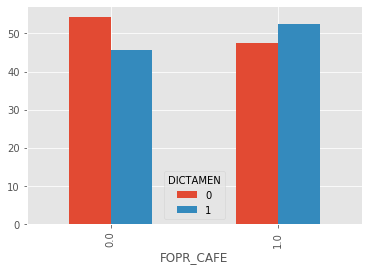

In [72]:
plot = pd.crosstab(index=df['FOPR_CAFE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [73]:
pd.crosstab(index=df['FOPR_ESDE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_ESDE,,
0.0,43.826579,56.173421
1.0,48.110225,51.889775


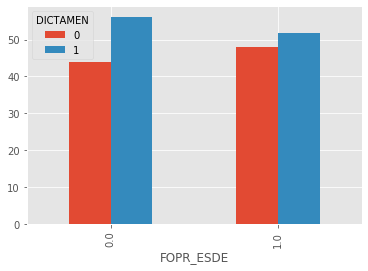

In [74]:
plot = pd.crosstab(index=df['FOPR_ESDE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [75]:
pd.crosstab(index=df['FOPR_SDTE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_SDTE,,
0.0,60.606061,39.393939
1.0,47.792041,52.207959


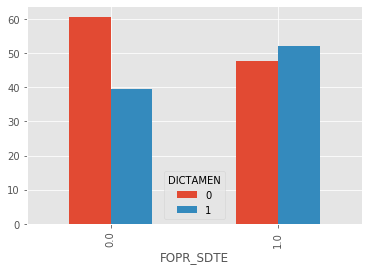

In [76]:
plot = pd.crosstab(index=df['FOPR_SDTE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [77]:
pd.crosstab(index=df['FOPR_ACIN'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_ACIN,,
0.0,50.285714,49.714286
1.0,47.762563,52.237437


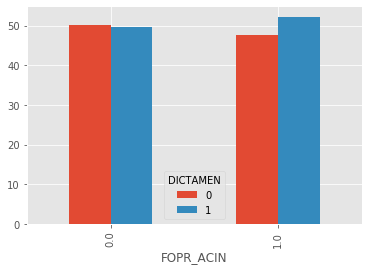

In [78]:
plot = pd.crosstab(index=df['FOPR_ACIN'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [79]:
pd.crosstab(index=df['FOPR_ACEL'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_ACEL,,
0.0,56.124722,43.875278
1.0,47.312266,52.687734


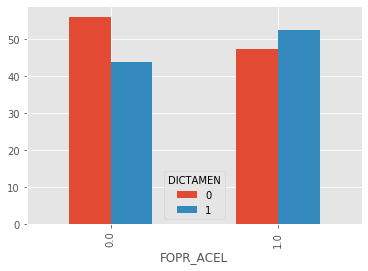

In [80]:
plot = pd.crosstab(index=df['FOPR_ACEL'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [81]:
pd.crosstab(index=df['FOPR_ABRE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_ABRE,,
0.0,58.105023,41.894977
1.0,47.207708,52.792292


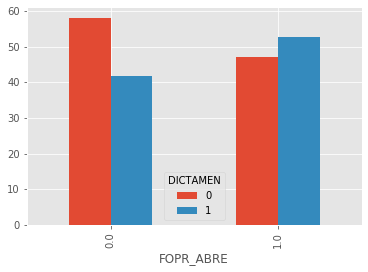

In [82]:
plot = pd.crosstab(index=df['FOPR_ABRE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [83]:
pd.crosstab(index=df['FOPR_BOTR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_BOTR,,
0.0,48.003758,51.996242
1.0,47.789973,52.210027


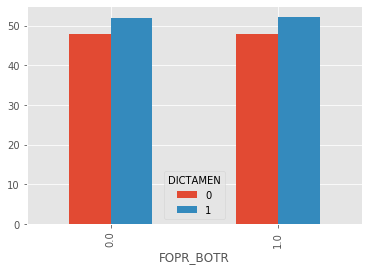

In [84]:
plot = pd.crosstab(index=df['FOPR_BOTR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [85]:
pd.crosstab(index=df['FOPR_LIMP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOPR_LIMP,,
0.0,57.894737,42.105263
1.0,47.796186,52.203814
5.0,47.575312,52.424688


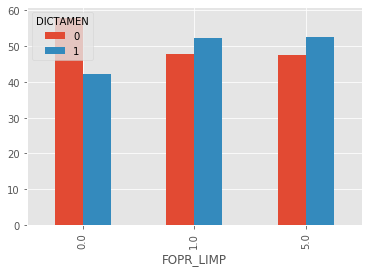

In [86]:
plot = pd.crosstab(index=df['FOPR_LIMP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [87]:
pd.crosstab(index=df['FOME_PECR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_PECR,,
0.0,50.561798,49.438202
1.0,47.803401,52.196599


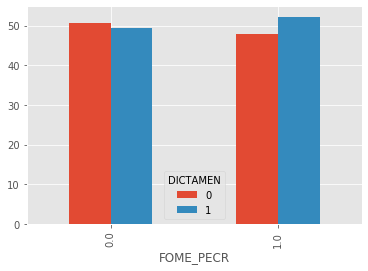

In [88]:
plot = pd.crosstab(index=df['FOME_PECR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [89]:
pd.crosstab(index=df['FOME_CARE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_CARE,,
0.0,49.206349,50.793651
1.0,47.813505,52.186495


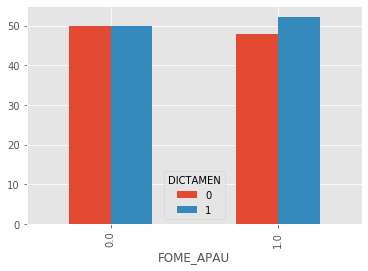

In [90]:
plot = pd.crosstab(index=df['FOME_APAU'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [91]:
pd.crosstab(index=df['FOME_FOPR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_FOPR,,
0.0,55.629139,44.370861
1.0,47.742853,52.257147


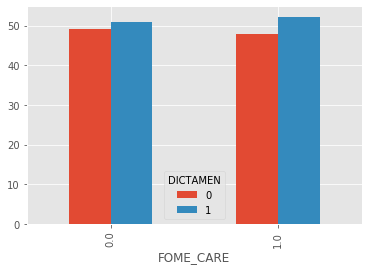

In [92]:
plot = pd.crosstab(index=df['FOME_CARE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [93]:
pd.crosstab(index=df['FOME_FOTE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_FOTE,,
0.0,67.567568,32.432432
1.0,47.772214,52.227786


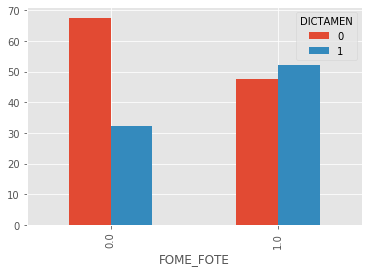

In [94]:
plot = pd.crosstab(index=df['FOME_FOTE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [95]:
pd.crosstab(index=df['FOME_EXOR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_EXOR,,
0.0,46.601942,53.398058
1.0,47.827208,52.172792


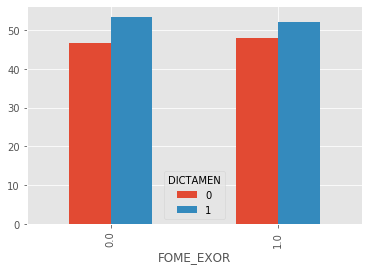

In [96]:
plot = pd.crosstab(index=df['FOME_EXOR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [97]:
pd.crosstab(index=df['FOME_EXES'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_EXES,,
0.0,46.774194,53.225806
1.0,47.827490,52.172510


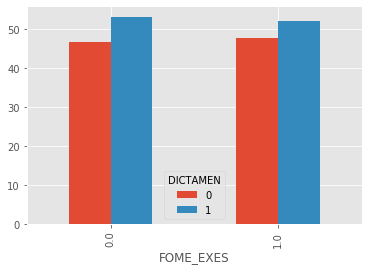

In [98]:
plot = pd.crosstab(index=df['FOME_EXES'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [99]:
pd.crosstab(index=df['FOME_IDEX'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_IDEX,,
0.0,50.607533,49.392467
1.0,47.490513,52.509487


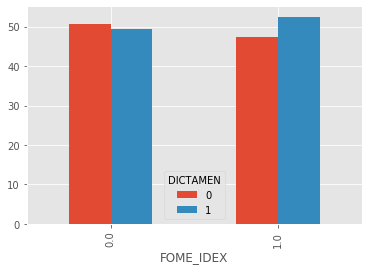

In [100]:
plot = pd.crosstab(index=df['FOME_IDEX'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [101]:
pd.crosstab(index=df['FOME_MDLT'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_MDLT,,
0.0,52.350699,47.649301
1.0,47.578578,52.421422


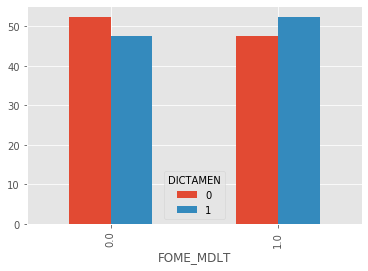

In [102]:
plot = pd.crosstab(index=df['FOME_MDLT'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [103]:
pd.crosstab(index=df['FOME_HBSI'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_HBSI,,
0.0,48.800000,51.200000
1.0,47.811209,52.188791


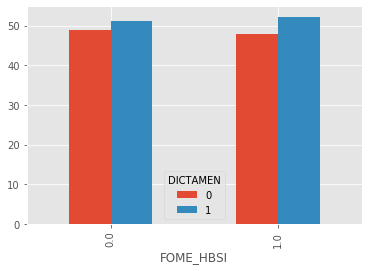

In [104]:
plot = pd.crosstab(index=df['FOME_HBSI'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [105]:
pd.crosstab(index=df['FOME_ABOR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)


DICTAMEN,0,1
FOME_ABOR,,
0.0,52.554745,47.445255
1.0,47.777203,52.222797


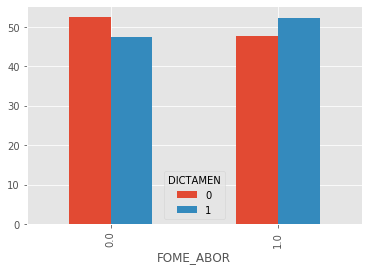

In [106]:
plot = pd.crosstab(index=df['FOME_ABOR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [107]:
pd.crosstab(index=df['FOME_ABRP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_ABRP,,
0.0,55.913978,44.086022
1.0,47.770619,52.229381


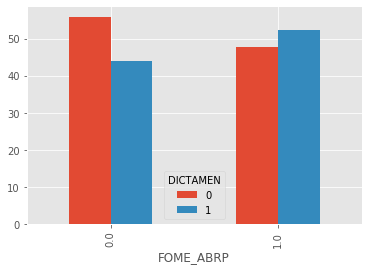

In [108]:
plot = pd.crosstab(index=df['FOME_ABRP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [109]:
pd.crosstab(index=df['FOME_VCDE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_VCDE,,
0.0,45.205479,54.794521
1.0,47.868938,52.131062


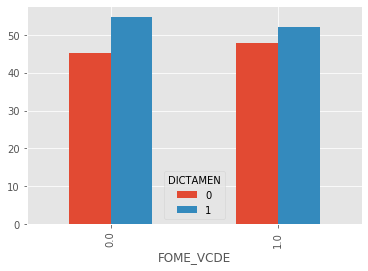

In [110]:
plot = pd.crosstab(index=df['FOME_VCDE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [111]:
pd.crosstab(index=df['FOME_LIDE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_LIDE,,
0.0,40.408163,59.591837
1.0,47.937272,52.062728


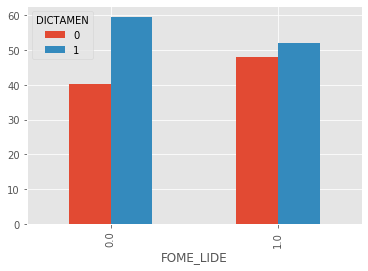

In [112]:
plot = pd.crosstab(index=df['FOME_LIDE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [113]:
pd.crosstab(index=df['FOME_CMPP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_CMPP,,
0.0,40.801887,59.198113
1.0,48.015011,51.984989


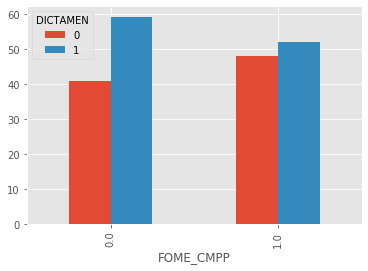

In [114]:
plot = pd.crosstab(index=df['FOME_CMPP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [115]:
pd.crosstab(index=df['FOME_TODE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_TODE,,
0.0,42.929293,57.070707
1.0,47.881933,52.118067


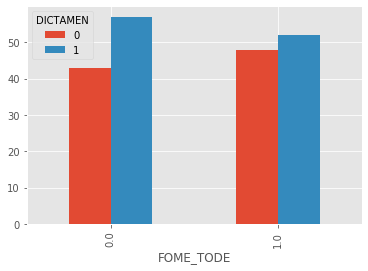

In [116]:
plot = pd.crosstab(index=df['FOME_TODE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [117]:
pd.crosstab(index=df['FOME_TRCO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_TRCO,,
0.0,54.464286,45.535714
1.0,47.771112,52.228888


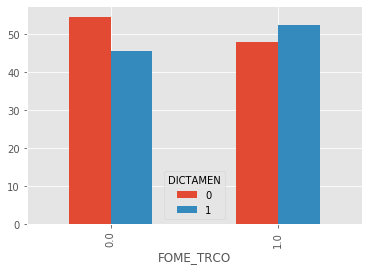

In [118]:
plot = pd.crosstab(index=df['FOME_TRCO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [119]:
pd.crosstab(index=df['FOME_CUGE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_CUGE,,
0.0,47.111111,52.888889
1.0,47.829478,52.170522


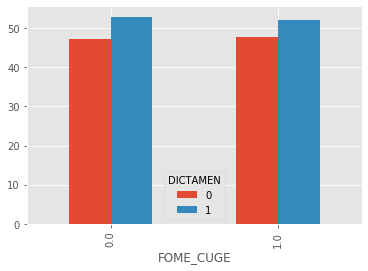

In [120]:
plot = pd.crosstab(index=df['FOME_CUGE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [121]:
pd.crosstab(index=df['FOME_REIN'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_REIN,,
0.0,51.376147,48.623853
1.0,47.768756,52.231244


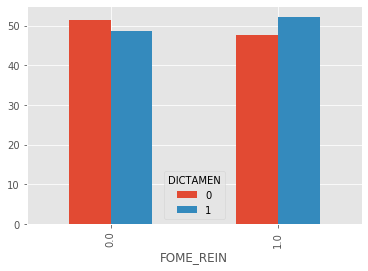

In [122]:
plot = pd.crosstab(index=df['FOME_REIN'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [123]:
pd.crosstab(index=df['FOME_EOAD'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_EOAD,,
0.0,50.694444,49.305556
1.0,47.792359,52.207641


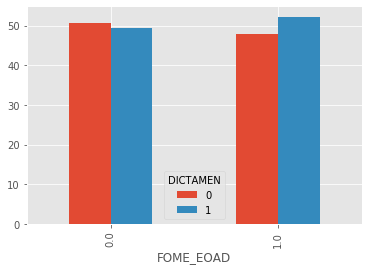

In [124]:
plot = pd.crosstab(index=df['FOME_EOAD'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [125]:
pd.crosstab(index=df['FOME_CANE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_CANE,,
0.0,52.671756,47.328244
1.0,47.778065,52.221935


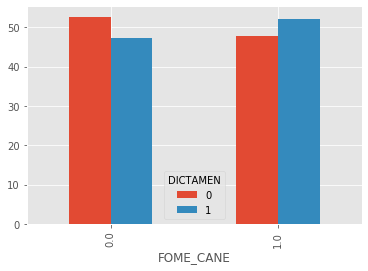

In [126]:
plot = pd.crosstab(index=df['FOME_CANE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [127]:
pd.crosstab(index=df['FOME_FTGP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_FTGP,,
0.0,54.054054,45.945946
1.0,47.789433,52.210567


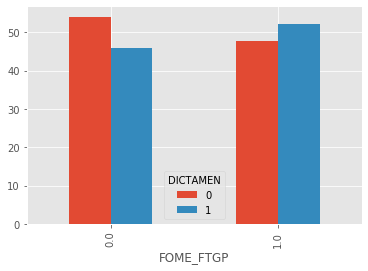

In [128]:
plot = pd.crosstab(index=df['FOME_FTGP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [129]:
pd.crosstab(index=df['FOME_RESO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_RESO,,
0.0,48.648649,51.351351
1.0,47.813185,52.186815


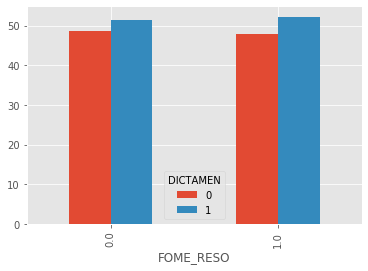

In [130]:
plot = pd.crosstab(index=df['FOME_RESO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [131]:
pd.crosstab(index=df['FOME_COET'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)


DICTAMEN,0,1
FOME_COET,,
0.0,49.056604,50.943396
1.0,47.810666,52.189334


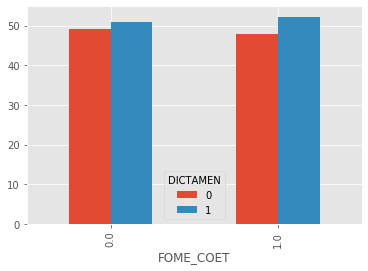

In [132]:
plot = pd.crosstab(index=df['FOME_COET'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [133]:
pd.crosstab(index=df['FOME_CECC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
FOME_CECC,,
0.0,42.975207,57.024793
1.0,47.856958,52.143042


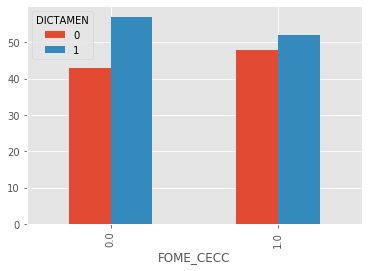

In [134]:
plot = pd.crosstab(index=df['FOME_CECC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [135]:
pd.crosstab(index=df['FOME_CCMA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)


DICTAMEN,0,1
FOME_CCMA,,
0.0,46.666667,53.333333
1.0,47.833701,52.166299


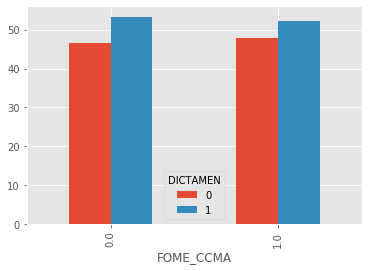

In [136]:
plot = pd.crosstab(index=df['FOME_CCMA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [137]:
pd.crosstab(index=df['MAE_DMAT'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_DMAT,,
0.00,55.319149,44.680851
0.33,52.885052,47.114948
0.66,45.903469,54.096531
1.00,51.301685,48.698315


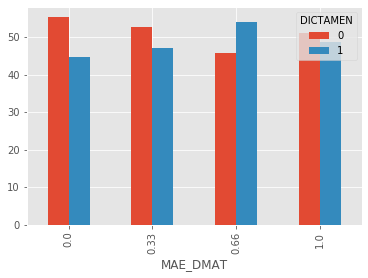

In [138]:
plot = pd.crosstab(index=df['MAE_DMAT'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [139]:
pd.crosstab(index=df['MAE_UEDA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_UEDA,,
0.00,56.756757,43.243243
0.33,47.362489,52.637511
0.66,46.476147,53.523853
1.00,53.491379,46.508621


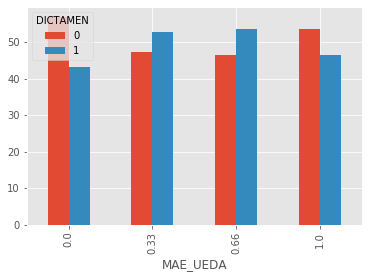

In [140]:
plot = pd.crosstab(index=df['MAE_UEDA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [141]:
pd.crosstab(index=df['MAE_ASIS'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_ASIS,,
0.00,62.121212,37.878788
0.33,58.673863,41.326137
0.66,46.097709,53.902291
1.00,48.266423,51.733577


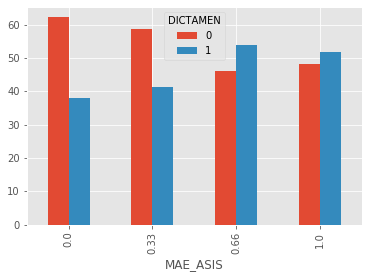

In [142]:
plot = pd.crosstab(index=df['MAE_ASIS'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [143]:
pd.crosstab(index=df['MAE_CLAP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_CLAP,,
0.00,58.928571,41.071429
0.33,47.201385,52.798615
0.66,45.730325,54.269675
1.00,55.044183,44.955817


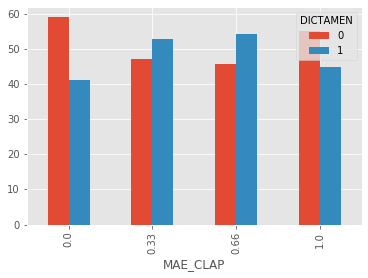

In [144]:
plot = pd.crosstab(index=df['MAE_CLAP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [145]:
pd.crosstab(index=df['MAE_PPDE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_PPDE,,
0.00,64.705882,35.294118
0.33,47.794351,52.205649
0.66,46.863778,53.136222
1.00,49.529703,50.470297


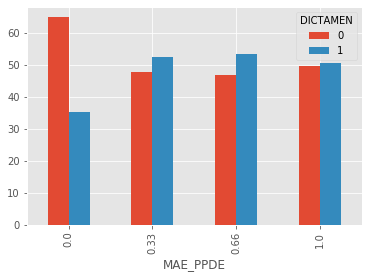

In [146]:
plot = pd.crosstab(index=df['MAE_PPDE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [147]:
pd.crosstab(index=df['MAE_TAR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_TAR,,
0.00,43.478261,56.521739
0.33,45.762712,54.237288
0.66,46.748435,53.251565
1.00,50.218261,49.781739


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


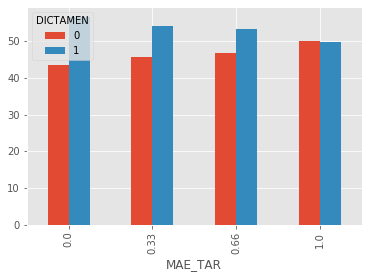

In [148]:
plot = pd.crosstab(index=df['MAE_TAR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [149]:
pd.crosstab(index=df['MAE_RET'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_RET,,
0.00,37.634409,62.365591
0.33,44.022770,55.977230
0.66,47.560368,52.439632
1.00,53.639144,46.360856


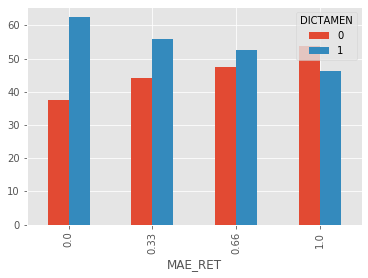

In [150]:
plot = pd.crosstab(index=df['MAE_RET'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [151]:
pd.crosstab(index=df['MAE_HEC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_HEC,,
0.00,56.250000,43.750000
0.33,52.420917,47.579083
0.66,47.014524,52.985476
1.00,47.583587,52.416413


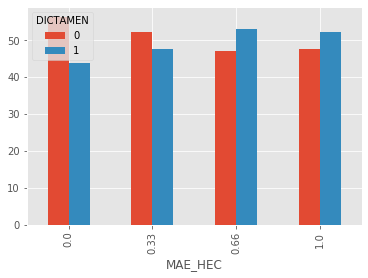

In [152]:
plot = pd.crosstab(index=df['MAE_HEC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [153]:
pd.crosstab(index=df['MAE_FAC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_FAC,,
0.00,51.142632,48.857368
0.33,45.106498,54.893502
0.66,57.700348,42.299652
1.00,62.573099,37.426901


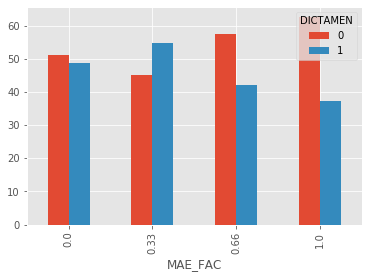

In [154]:
plot = pd.crosstab(index=df['MAE_FAC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [155]:
pd.crosstab(index=df['MAE_ICC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_ICC,,
0.00,60.416667,39.583333
0.33,54.788732,45.211268
0.66,46.249583,53.750417
1.00,48.523125,51.476875


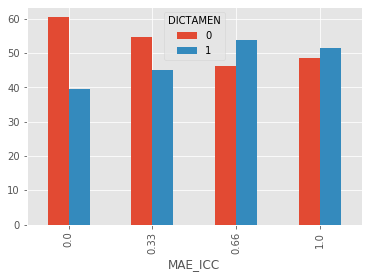

In [156]:
plot = pd.crosstab(index=df['MAE_ICC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [157]:
pd.crosstab(index=df['MAE_VNC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_VNC,,
0.00,50.000000,50.000000
0.33,47.538817,52.461183
0.66,47.142857,52.857143
1.00,49.717514,50.282486


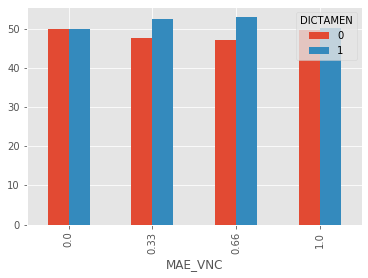

In [158]:
plot = pd.crosstab(index=df['MAE_VNC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [159]:
pd.crosstab(index=df['MAE_DCO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_DCO,,
0.00,49.275362,50.724638
0.33,46.963013,53.036987
0.66,46.910112,53.089888
1.00,50.056702,49.943298


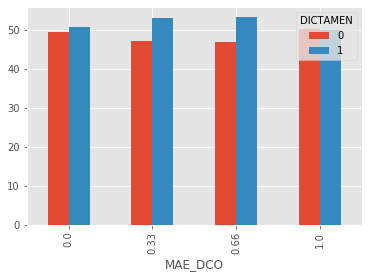

In [160]:
plot = pd.crosstab(index=df['MAE_DCO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [161]:
pd.crosstab(index=df['MAE_ICI'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_ICI,,
0.00,52.380952,47.619048
0.33,47.440273,52.559727
0.66,45.884992,54.115008
1.00,56.380952,43.619048


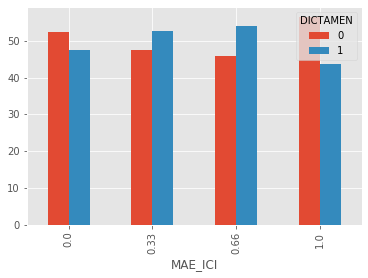

In [162]:
plot = pd.crosstab(index=df['MAE_ICI'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [163]:
pd.crosstab(index=df['MAE_RDE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_RDE,,
0.00,56.000000,44.000000
0.33,48.526728,51.473272
0.66,46.581597,53.418403
1.00,50.156937,49.843063


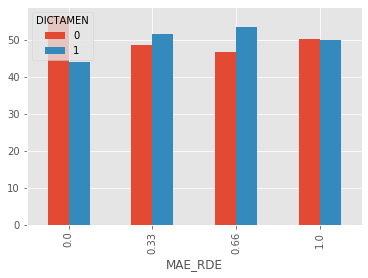

In [164]:
plot = pd.crosstab(index=df['MAE_RDE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [165]:
pd.crosstab(index=df['MAE_EIC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_EIC,,
0.00,51.824818,48.175182
0.33,49.450255,50.549745
0.66,46.352083,53.647917
1.00,49.615266,50.384734


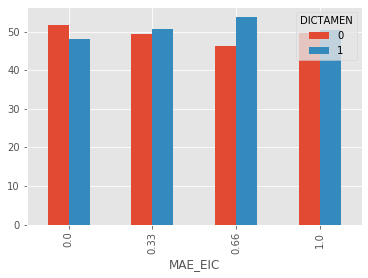

In [166]:
plot = pd.crosstab(index=df['MAE_EIC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [167]:
pd.crosstab(index=df['MAE_FIN'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
MAE_FIN,,
0.00,45.408163,54.591837
0.33,44.449235,55.550765
0.66,48.700754,51.299246
1.00,50.524862,49.475138


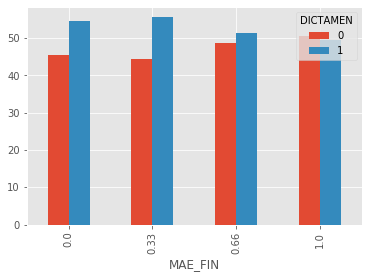

In [168]:
plot = pd.crosstab(index=df['MAE_FIN'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [169]:
pd.crosstab(index=df['PRA_PROF'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
PRA_PROF,,
0.0,47.150175,52.849825
1.0,50.301750,49.698250


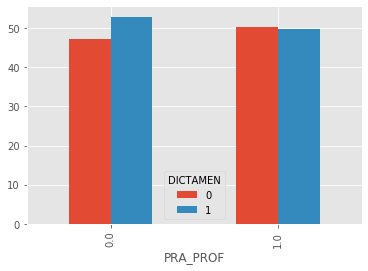

In [170]:
plot = pd.crosstab(index=df['PRA_PROF'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [171]:
pd.crosstab(index=df['PRPF_AACA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
PRPF_AACA,,
1.0,50.722800,49.277200
2.0,65.441176,34.558824
3.0,52.412281,47.587719
4.0,51.757188,48.242812
5.0,44.809890,55.190110


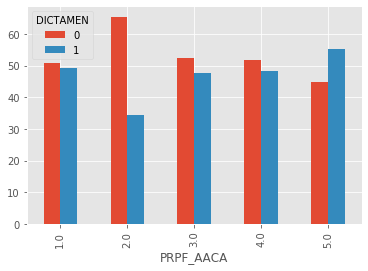

In [172]:
plot = pd.crosstab(index=df['PRPF_AACA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [173]:
pd.crosstab(index=df['PRPF_MPNC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
PRPF_MPNC,,
1.0,50.558376,49.441624
2.0,67.889908,32.110092
3.0,58.857143,41.142857
4.0,53.487032,46.512968
5.0,45.004747,54.995253


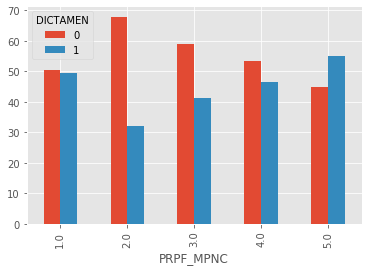

In [174]:
plot = pd.crosstab(index=df['PRPF_MPNC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [175]:
pd.crosstab(index=df['PRPF_MAET'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
PRPF_MAET,,
1.0,50.753769,49.246231
2.0,49.177632,50.822368
3.0,47.132955,52.867045
4.0,48.439412,51.560588
5.0,44.155545,55.844455


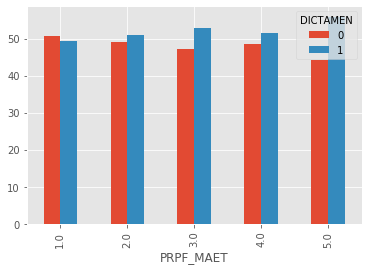

In [176]:
plot = pd.crosstab(index=df['PRPF_MAET'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [177]:
pd.crosstab(index=df['SER_MAAC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_MAAC,,
0.0,46.807747,53.192253
1.0,48.038986,51.961014


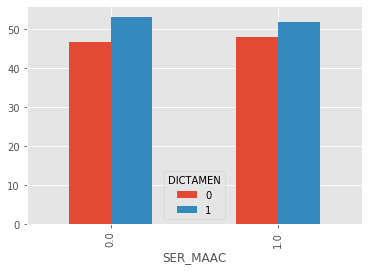

In [178]:
plot = pd.crosstab(index=df['SER_MAAC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [179]:
pd.crosstab(index=df['SER_MPNC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_MPNC,,
0.0,48.262381,51.737619
1.0,47.742469,52.257531


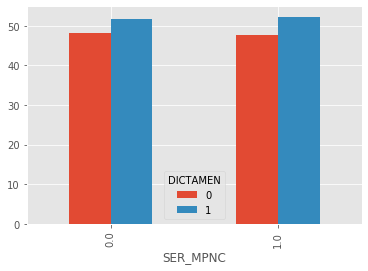

In [180]:
plot = pd.crosstab(index=df['SER_MPNC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [181]:
pd.crosstab(index=df['SER_MAET'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_MAET,,
0.0,47.145625,52.854375
1.0,48.326595,51.673405


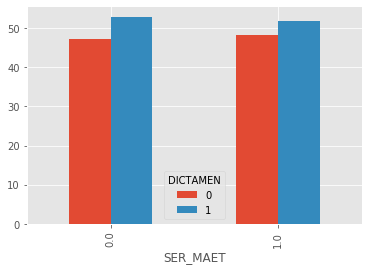

In [182]:
plot = pd.crosstab(index=df['SER_MAET'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [183]:
pd.crosstab(index=df['TIEM_TRAB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
TIEM_TRAB,,
0.00,46.773109,53.226891
0.33,47.633358,52.366642
0.66,45.561871,54.438129
1.00,50.339415,49.660585


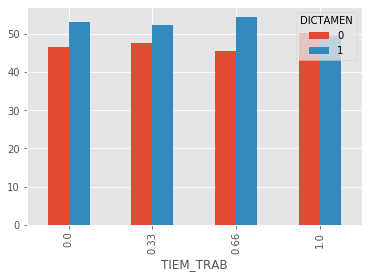

In [184]:
plot = pd.crosstab(index=df['TIEM_TRAB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [185]:
pd.crosstab(index=df['SEMA_TRAB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SEMA_TRAB,,
0.00,50.941307,49.058693
0.33,44.291070,55.708930
0.66,48.656250,51.343750
1.00,50.432581,49.567419


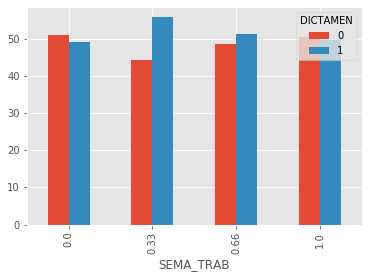

In [186]:
plot = pd.crosstab(index=df['SEMA_TRAB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [187]:
pd.crosstab(index=df['INS_TRAB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)


DICTAMEN,0,1
INS_TRAB,,
0.0,48.394886,51.605114
1.0,47.346320,52.653680


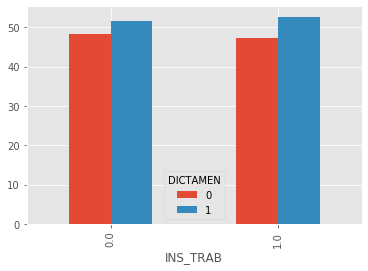

In [188]:
plot = pd.crosstab(index=df['INS_TRAB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [189]:
pd.crosstab(index=df['HRS_TRAB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)


DICTAMEN,0,1
HRS_TRAB,,
0.00,47.891456,52.108544
0.33,45.270270,54.729730
0.66,51.351351,48.648649
1.00,48.594321,51.405679


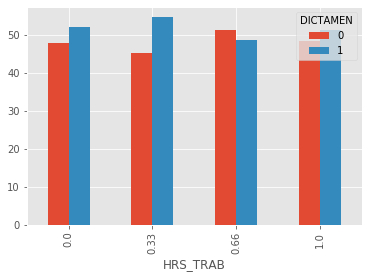

In [190]:
plot = pd.crosstab(index=df['HRS_TRAB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [191]:
pd.crosstab(index=df['REL_TRA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
REL_TRA,,
0.0,49.342861,50.657139
1.0,46.283436,53.716564


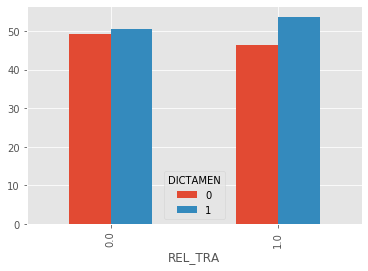

In [192]:
plot = pd.crosstab(index=df['REL_TRA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [193]:
pd.crosstab(index=df['EVA_ETRA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
EVA_ETRA,,
0.0,41.741888,58.258112
1.0,49.982630,50.017370


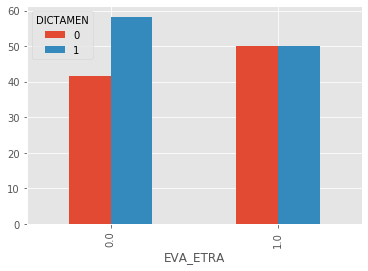

In [194]:
plot = pd.crosstab(index=df['EVA_ETRA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [195]:
pd.crosstab(index=df['GAN_CLIC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
GAN_CLIC,,
0.00,52.027027,47.972973
0.33,67.796610,32.203390
0.50,52.554894,47.445106
0.66,44.785870,55.214130
1.00,42.674095,57.325905


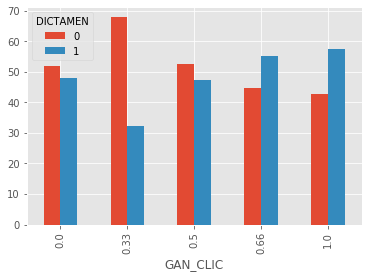

In [196]:
plot = pd.crosstab(index=df['GAN_CLIC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [197]:
pd.crosstab(index=df['SIT_LAB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)


DICTAMEN,0,1
SIT_LAB,,
0.00,54.598826,45.401174
0.33,49.785714,50.214286
0.66,54.134919,45.865081
1.00,41.612484,58.387516


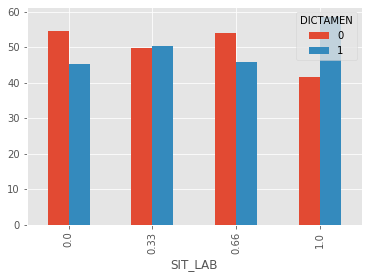

In [198]:
plot = pd.crosstab(index=df['SIT_LAB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [199]:
pd.crosstab(index=df['ESC_MAD'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
ESC_MAD,,
0.002,48.571429,51.428571
0.020,58.670520,41.329480
0.040,37.789661,62.210339
0.140,45.000000,55.000000
0.150,43.231649,56.768351
0.170,40.855207,59.144793
0.200,55.250404,44.749596
0.280,49.218927,50.781073


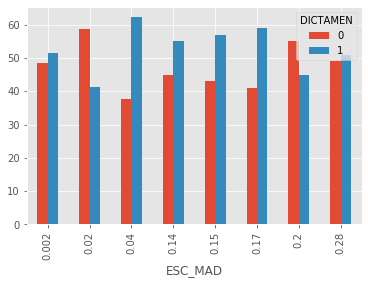

In [200]:
plot = pd.crosstab(index=df['ESC_MAD'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [201]:
pd.crosstab(index=df['ESC_PAD'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
ESC_PAD,,
0.02,50.261097,49.738903
0.06,41.740088,58.259912
0.08,43.682907,56.317093
0.15,44.244604,55.755396
0.19,55.181273,44.818727
0.22,50.713893,49.286107
0.24,41.947008,58.052992


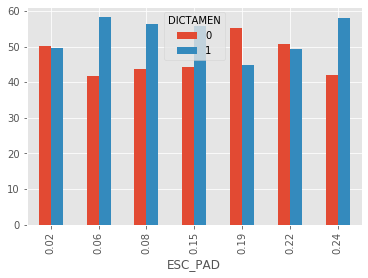

In [202]:
plot = pd.crosstab(index=df['ESC_PAD'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [203]:
pd.crosstab(index=df['CUAN_LIB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
CUAN_LIB,,
0.005,70.400000,29.600000
0.040,39.534884,60.465116
0.070,41.316073,58.683927
0.120,40.669560,59.330440
0.130,58.383353,41.616647
0.190,44.111425,55.888575
0.220,49.706458,50.293542
0.230,46.702217,53.297783


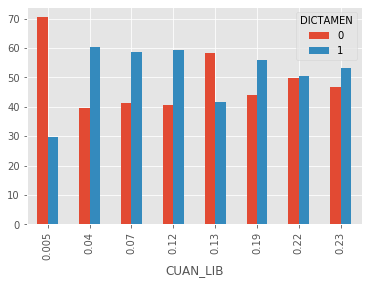

In [204]:
plot = pd.crosstab(index=df['CUAN_LIB'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [205]:
pd.crosstab(index=df['NIV_EDU'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
NIV_EDU,,
0.020,53.823529,46.176471
0.034,57.382040,42.617960
0.350,50.893921,49.106079
0.590,44.801556,55.198444


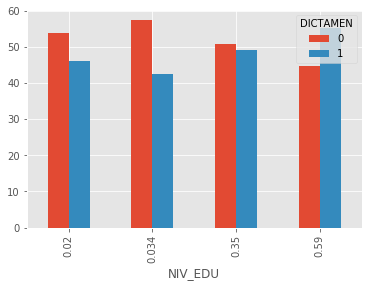

In [206]:
plot = pd.crosstab(index=df['NIV_EDU'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [207]:
pd.crosstab(index=df['CPV_CASA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
CPV_CASA,,
0.015,45.909091,54.090909
0.080,46.400694,53.599306
0.190,48.663641,51.336359
0.260,47.309136,52.690864
0.280,47.602421,52.397579


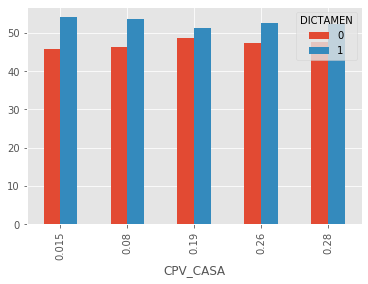

In [208]:
plot = pd.crosstab(index=df['CPV_CASA'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')


In [209]:
pd.crosstab(index=df['SER_TELE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_TELE,,
0.0,53.363568,46.636432
1.0,45.929234,54.070766


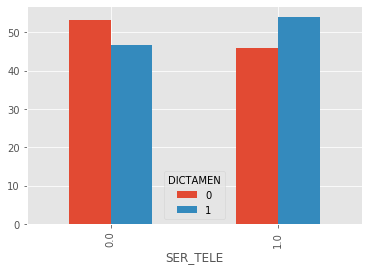

In [210]:
plot = pd.crosstab(index=df['SER_TELE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [211]:
pd.crosstab(index=df['SER_LAV'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_LAV,,
0.0,56.325493,43.674507
1.0,46.866097,53.133903


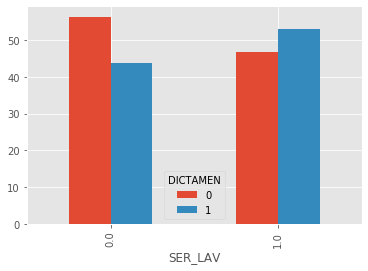

In [212]:
plot = pd.crosstab(index=df['SER_LAV'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [213]:
pd.crosstab(index=df['SER_REF'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_REF,,
0.0,70.186335,29.813665
1.0,47.586073,52.413927


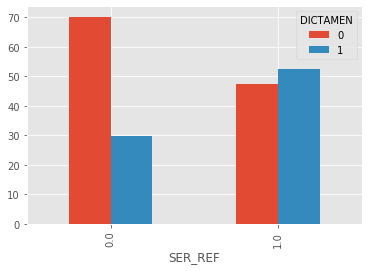

In [214]:
plot = pd.crosstab(index=df['SER_REF'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [215]:
pd.crosstab(index=df['SER_HOR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_HOR,,
0.0,53.834671,46.165329
1.0,44.675249,55.324751


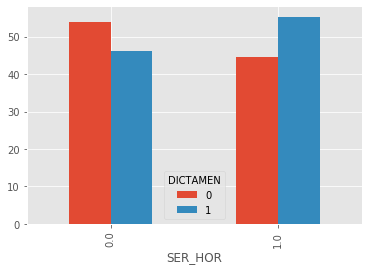

In [216]:
plot = pd.crosstab(index=df['SER_HOR'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [217]:
pd.crosstab(index=df['SER_INTE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_INTE,,
0.0,59.901924,40.098076
1.0,45.347940,54.652060


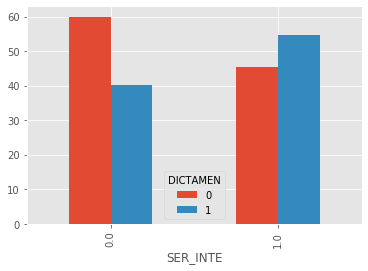

In [218]:
plot = pd.crosstab(index=df['SER_INTE'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [219]:
pd.crosstab(index=df['SER_TVP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_TVP,,
0.0,47.374413,52.625587
1.0,48.183089,51.816911


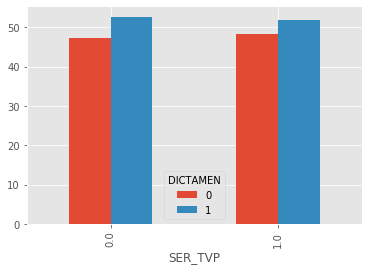

In [220]:
plot = pd.crosstab(index=df['SER_TVP'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [221]:
pd.crosstab(index=df['SER_TABL'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_TABL,,
0.0,49.362081,50.637919
1.0,44.983642,55.016358


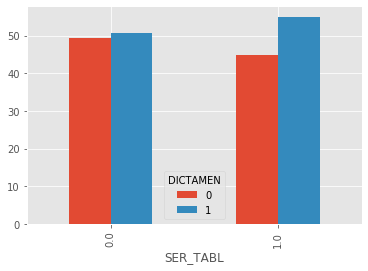

In [222]:
plot = pd.crosstab(index=df['SER_TABL'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [223]:
pd.crosstab(index=df['CUARTOS'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
CUARTOS,,
0.02,56.235294,43.764706
0.04,42.702703,57.297297
0.09,42.345773,57.654227
0.22,48.570608,51.429392
0.41,48.010694,51.989306


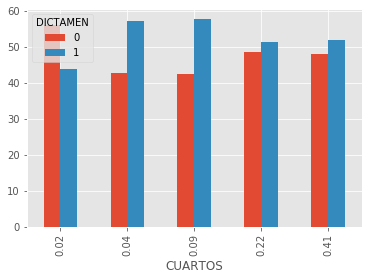

In [224]:
plot = pd.crosstab(index=df['CUARTOS'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [225]:
pd.crosstab(index=df['SER_PC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_PC,,
0.0,60.104987,39.895013
1.0,46.490170,53.509830


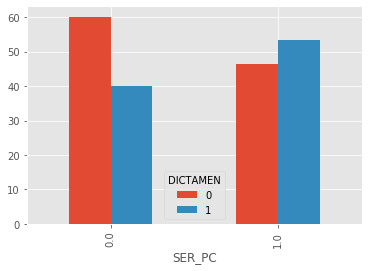

In [226]:
plot = pd.crosstab(index=df['SER_PC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [227]:
pd.crosstab(index=df['SER_TV'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_TV,,
0.0,56.113903,43.886097
1.0,47.489345,52.510655


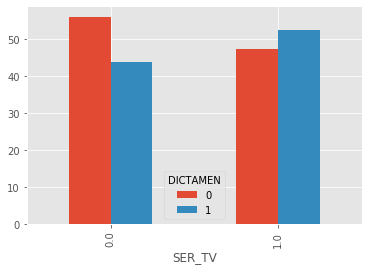

In [228]:
plot = pd.crosstab(index=df['SER_TV'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [229]:
pd.crosstab(index=df['SER_AUTO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_AUTO,,
0.0,52.639389,47.360611
1.0,45.732379,54.267621


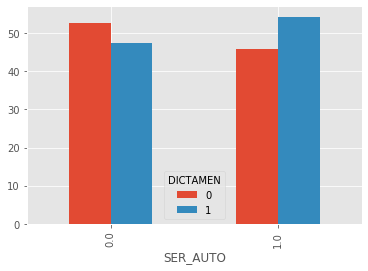

In [230]:
plot = pd.crosstab(index=df['SER_AUTO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [231]:
pd.crosstab(index=df['SER_BANO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
SER_BANO,,
0.0,56.502242,43.497758
1.0,47.693307,52.306693


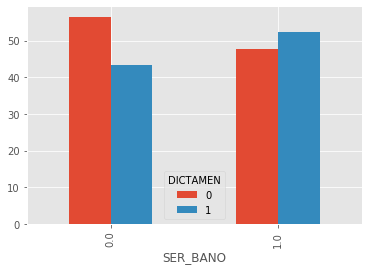

In [232]:
plot = pd.crosstab(index=df['SER_BANO'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [233]:
pd.crosstab(index=df['VAC_RM'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
VAC_RM,,
0.0,55.045024,44.954976
1.0,45.045205,54.954795


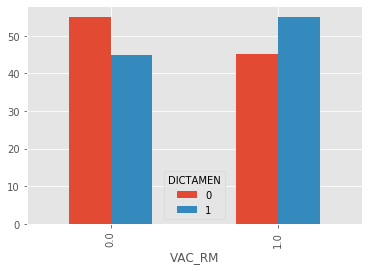

In [234]:
plot = pd.crosstab(index=df['VAC_RM'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [235]:
pd.crosstab(index=df['DICTAMEN'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
DICTAMEN,,
0,100.0,0.0
1,0.0,100.0


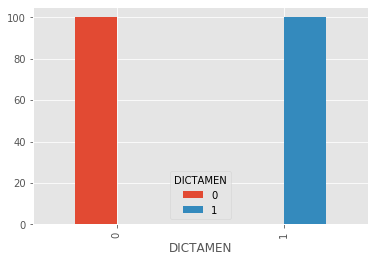

In [236]:
plot = pd.crosstab(index=df['DICTAMEN'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')

In [237]:
pd.crosstab(index=df['PRO_LIC'], columns=df['DICTAMEN']).apply(lambda r: r/r.sum() *100,axis=1)

DICTAMEN,0,1
PRO_LIC,,
0.002700,77.272727,22.727273
0.019762,79.503106,20.496894
0.166442,18.510324,81.489676
0.562538,61.466288,38.533712
1.000000,44.810873,55.189127


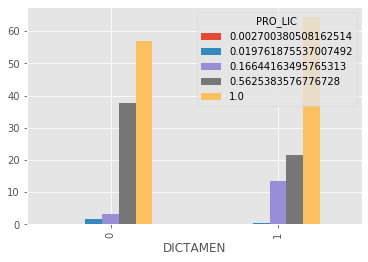

In [238]:
plot = pd.crosstab(index=df['DICTAMEN'], columns=df['PRO_LIC']).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='bar')